<a href="https://colab.research.google.com/github/varsha217/varsha217/blob/main/customer_churn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import warnings
warnings.filterwarnings('ignore')


In [2]:
# dataset loading
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# load the dataset
telecom_df = pd.read_csv('/content/drive/MyDrive/python project /telecom_churn.csv')

In [7]:
telecom_df.head()
telecom_df.info()
telecom_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [8]:
telecom_df.shape

(3333, 11)

DUPLICATE VALUES

In [9]:
#Dataset Duplicate values count
telecom_df.duplicated().sum()

0

In [10]:
#missing values/null values
telecom_df.isnull().sum()

,0
Churn,0
AccountWeeks,0
ContractRenewal,0
DataPlan,0
DataUsage,0
CustServCalls,0
DayMins,0
DayCalls,0
MonthlyCharge,0
OverageFee,0


<Axes: >

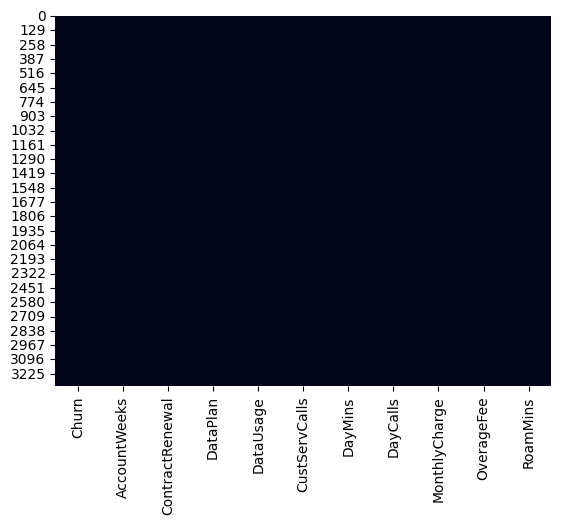

In [12]:
#visualising the missing values
sns.heatmap(telecom_df.isnull(),cbar=False)

In [13]:
# dataset columns
telecom_df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [14]:
#dataset describe
telecom_df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [16]:
# check unique values for each variables
for i in telecom_df.columns:
    print("no. of unique values in ",i," is", telecom_df[i].nunique())

no. of unique values in  Churn  is 2
no. of unique values in  AccountWeeks  is 212
no. of unique values in  ContractRenewal  is 2
no. of unique values in  DataPlan  is 2
no. of unique values in  DataUsage  is 174
no. of unique values in  CustServCalls  is 10
no. of unique values in  DayMins  is 1667
no. of unique values in  DayCalls  is 119
no. of unique values in  MonthlyCharge  is 627
no. of unique values in  OverageFee  is 1024
no. of unique values in  RoamMins  is 162


DATA WRANGLING

In [19]:
# DATASET ANALYSIS
#total no of customer churning
print("no of customers churning ;",telecom_df[telecom_df['Churn']==True].Churn.count())

no of customers churning ; 483


In [21]:
#variable assigning to churn data
churn_df = telecom_df[telecom_df["Churn"]==True]

In [23]:
# how many customers renewed contract
print("no of customers renewed the plan;",telecom_df[telecom_df['ContractRenewal']=='yes']['ContractRenewal'].count())

no of customers renewed the plan; 0


In [25]:
# how many customer service call loged
print("no of customer service calls ;",telecom_df[telecom_df['CustServCalls']>0]['CustServCalls'].count())

no of customer service calls ; 2636


In [26]:
# total no of accounts weeks
print("total no of accounts weeks ;",telecom_df['AccountWeeks'].sum())

total no of accounts weeks ; 336849


In [27]:
#total overage fee
print("total overage fee; ",telecom_df['OverageFee'].sum())

total overage fee;  33501.61


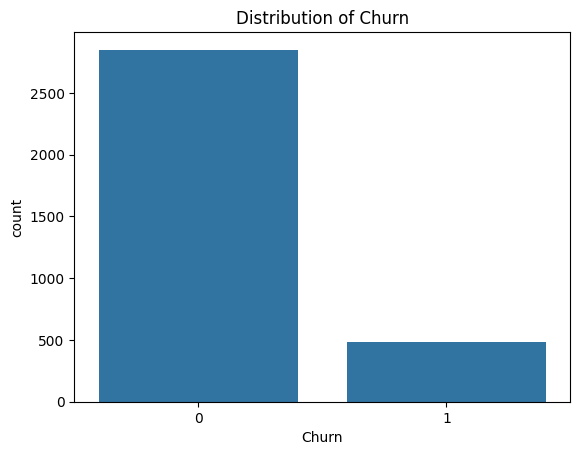

In [29]:
# Distribution of the target variable (Churn)
sns.countplot(x='Churn', data=telecom_df)
plt.title('Distribution of Churn')
plt.show()

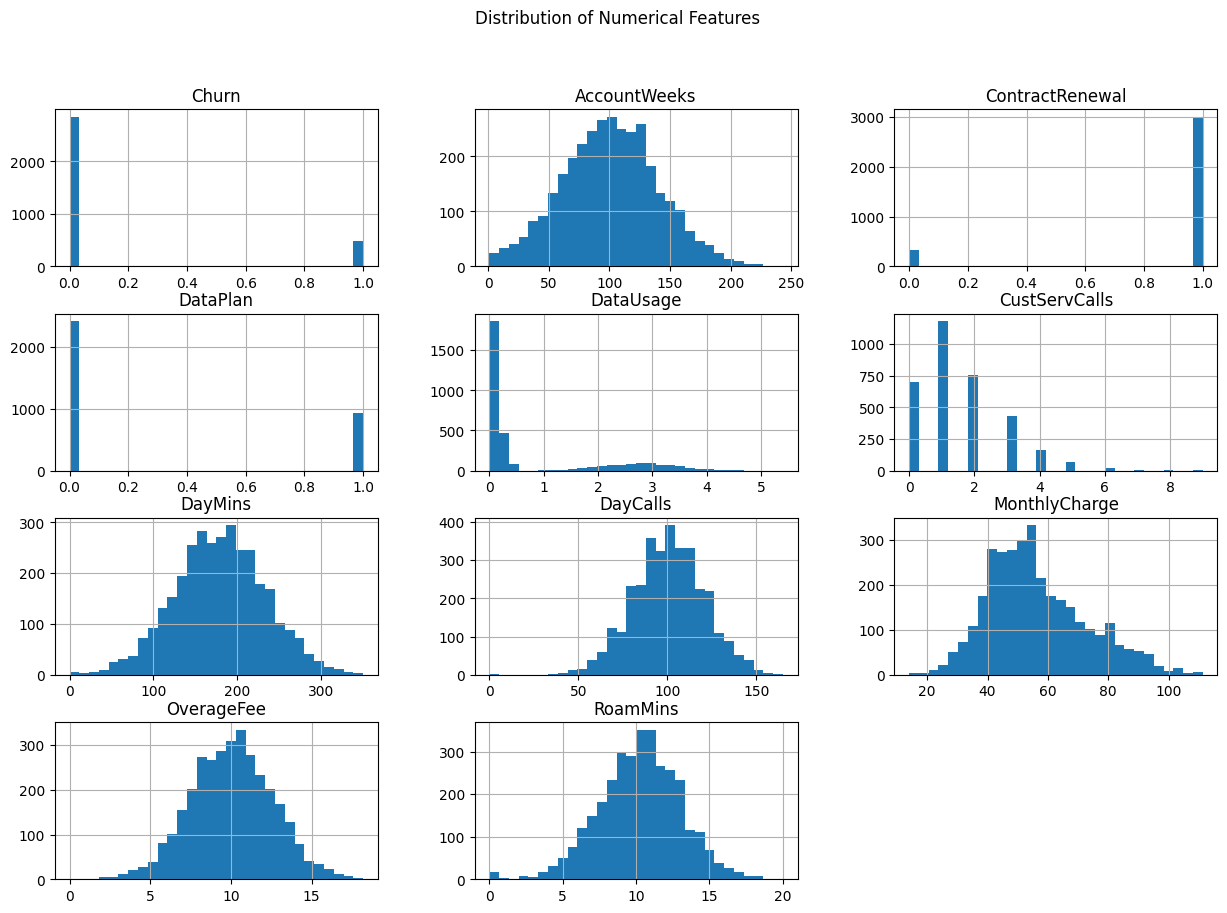

In [30]:
# Visualizing the distribution of numerical features
telecom_df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

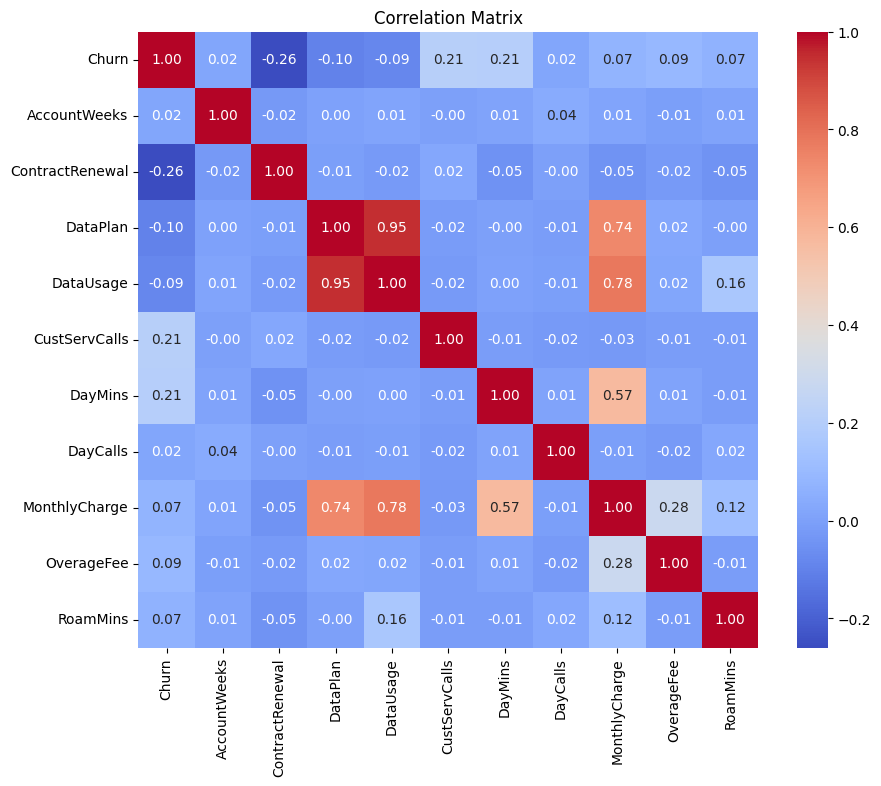

In [31]:
# Step 8: Correlation matrix
corr_matrix = telecom_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

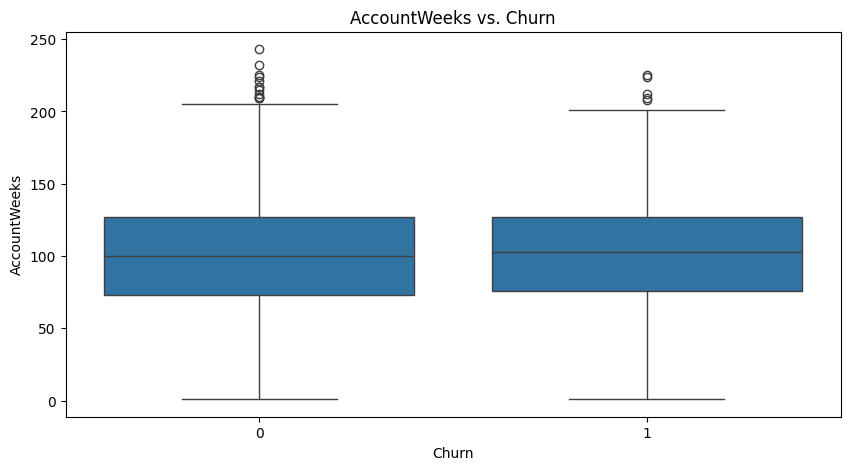

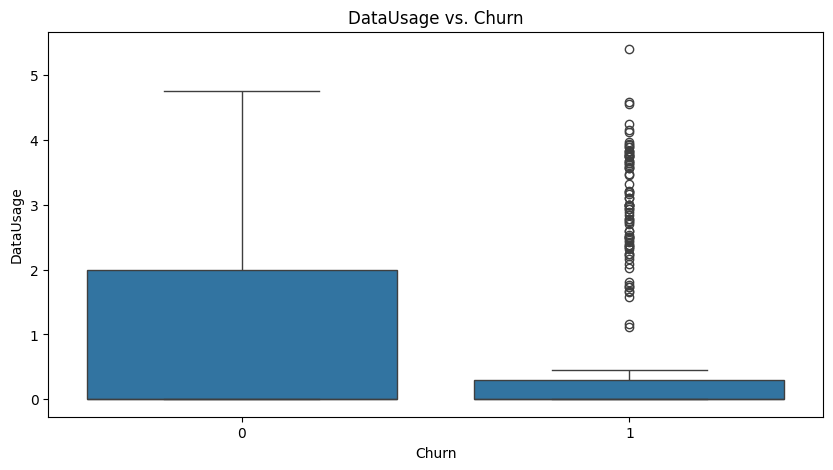

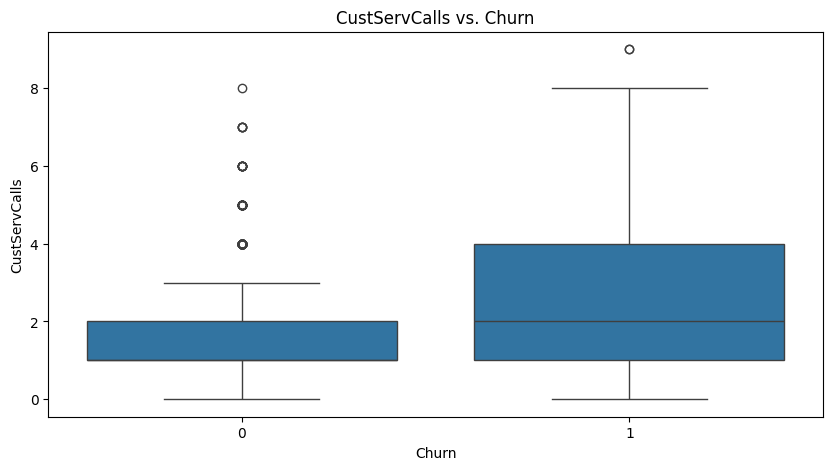

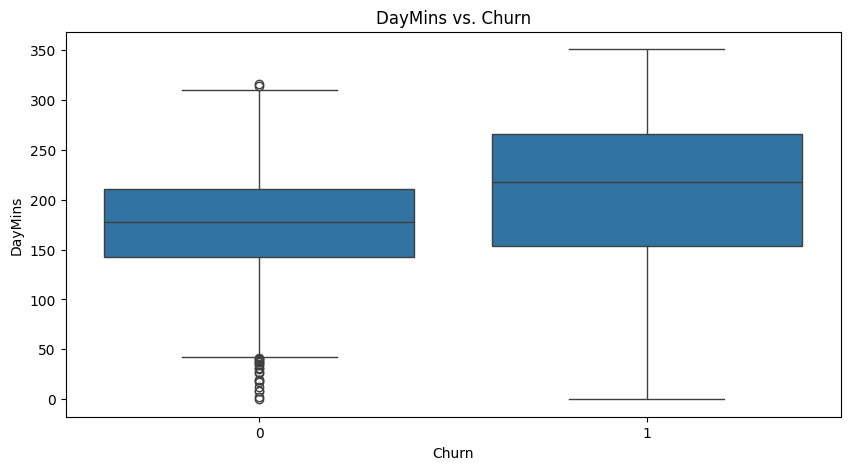

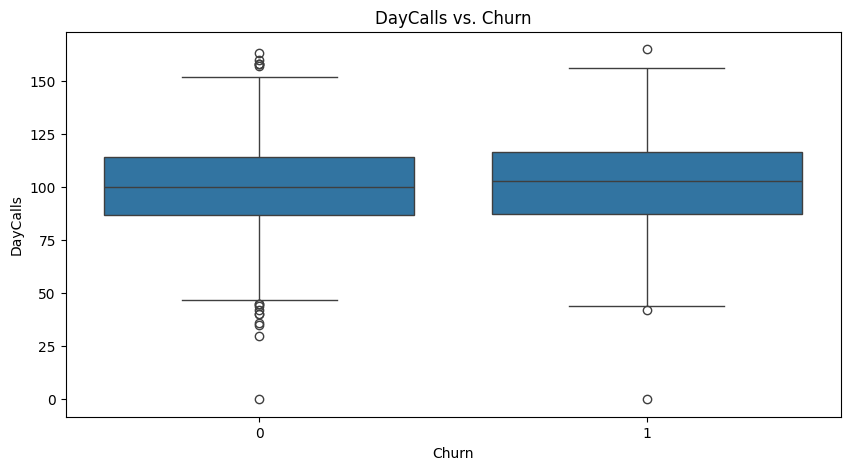

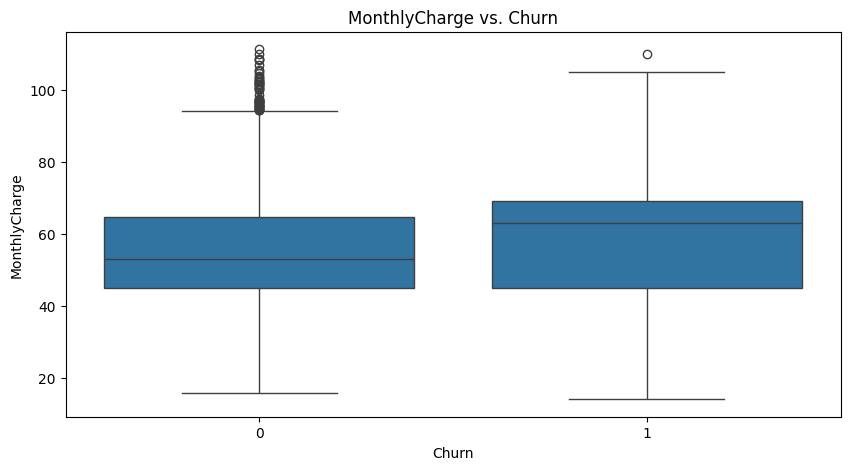

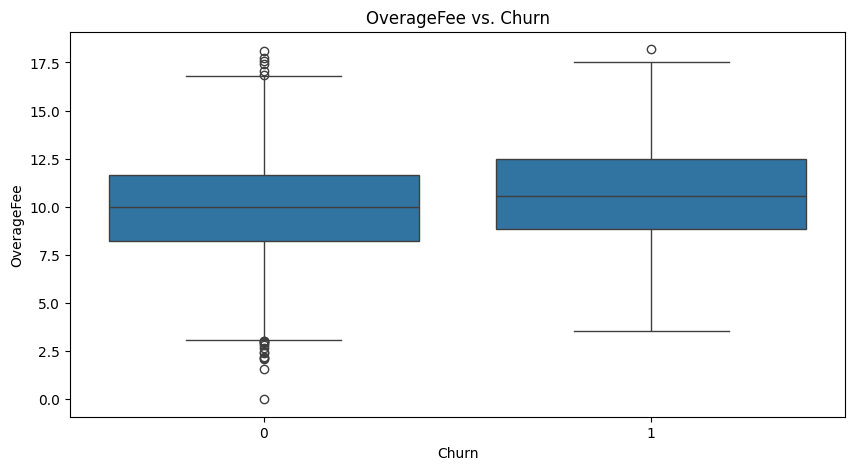

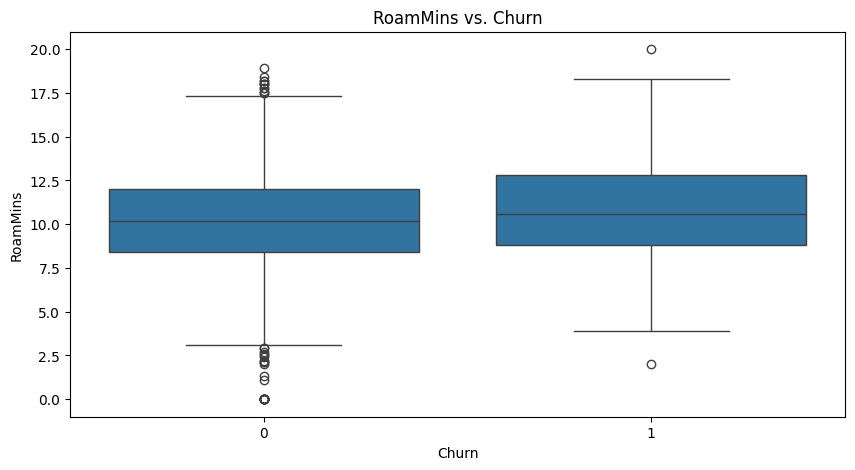

In [35]:
# Step 9: Boxplots for numerical features vs. Churn
numerical_features = ['AccountWeeks', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']

for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Churn', y=feature, data=telecom_df)
    plt.title(f'{feature} vs. Churn')
    plt.show()

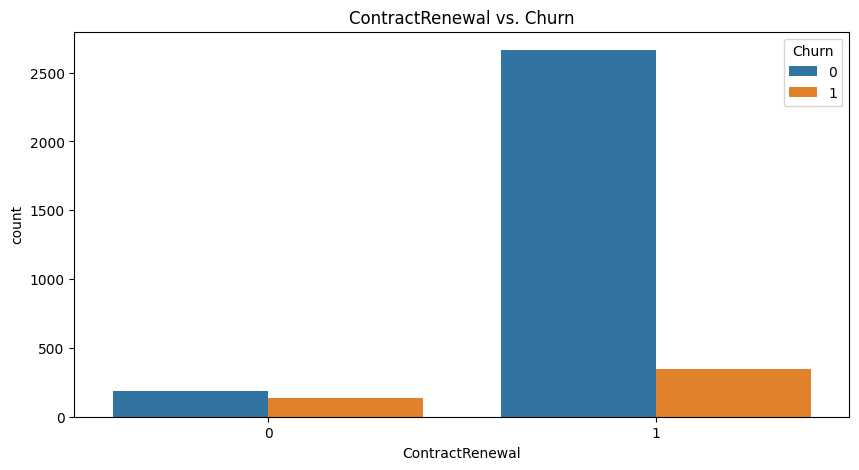

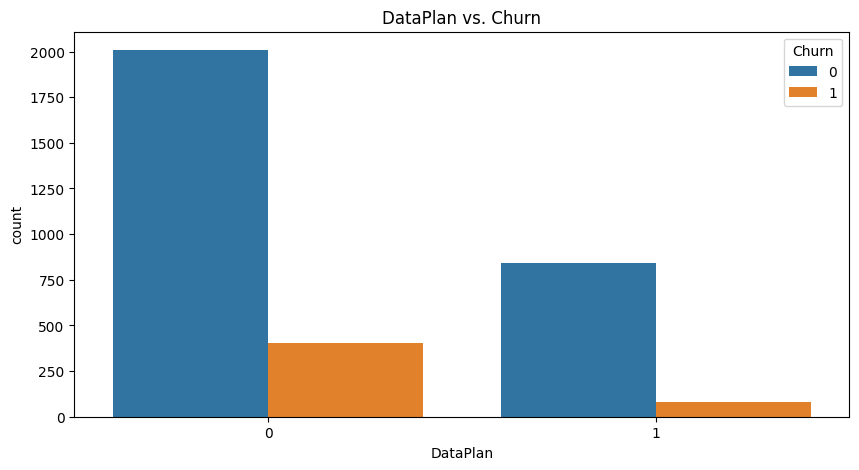

In [36]:
# Step 10: Countplots for categorical features vs. Churn
categorical_features = ['ContractRenewal', 'DataPlan']

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, hue='Churn', data=telecom_df)
    plt.title(f'{feature} vs. Churn')
    plt.show()

What this code does:
Distributions:

Shows the distribution of the Churn variable.
Displays histograms for all numerical features to understand their distributions.
Correlations:

Generates a correlation matrix to identify relationships between features.
Visualizes the correlation matrix using a heatmap.
Boxplots:

Creates boxplots for each numerical feature against Churn to observe how they vary with churn.
Countplots:

Generates countplots for categorical features (ContractRenewal, DataPlan) to see how they are distributed with respect to Churn.